<a href="https://colab.research.google.com/github/nhtusci/Creditcard-Customer-Churn-Sklearn/blob/main/CreditCard_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [ ]:
# Drop RowNumber, CustomerId, Surname and HasCrCard because its unnecessary
df.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [ ]:
# Check the missing value
check_missing = df.isnull().sum()
check_missing

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [ ]:
# Check the number of unique value
df.select_dtypes(include = 'object').nunique()

Geography    3
Gender       2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check outliers
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


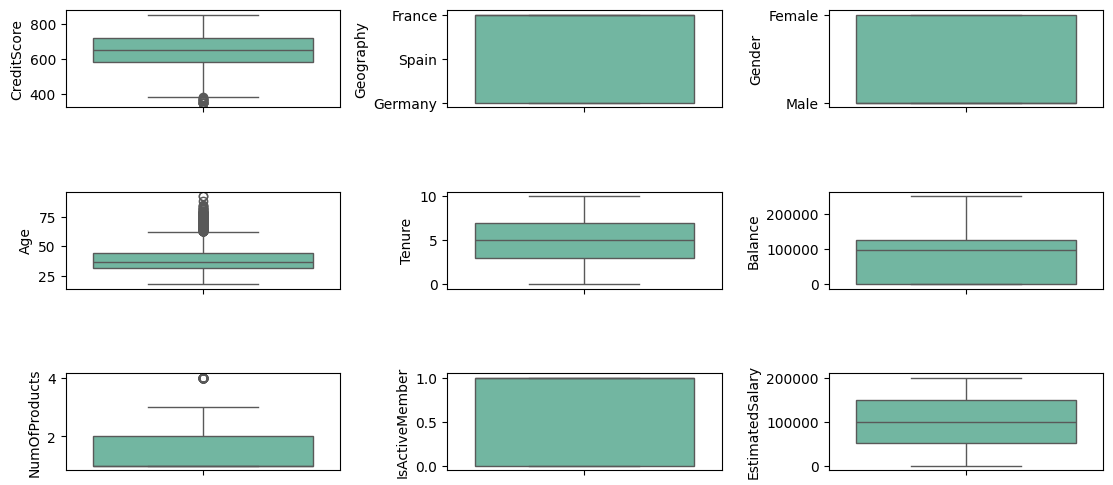

In [ ]:
# Create the list column names
cols = list(df.iloc[ : , : -1])

# Create a matrix of subplots(3*3)
fig, axes = plt.subplots(3,3, figsize=(12, 6 ))

# Add padding around the subplots
fig.tight_layout(pad=4.0)

# Create a box plot based on the data
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//3, i%3], y=df[cols[i]])

# Remove Outliers using IQR

In [ ]:
df.shape

(10000, 10)

In [ ]:
# specify the columns to remove outliers from dataframe
col_names = ["CreditScore", "NumOfProducts"]

# remove outliers for each selected columns using the IQR method
for col in col_names:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [ ]:
df.shape

(9926, 10)

# Exploratory Data Analysis

In [ ]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    1963
Name: Exited, dtype: int64

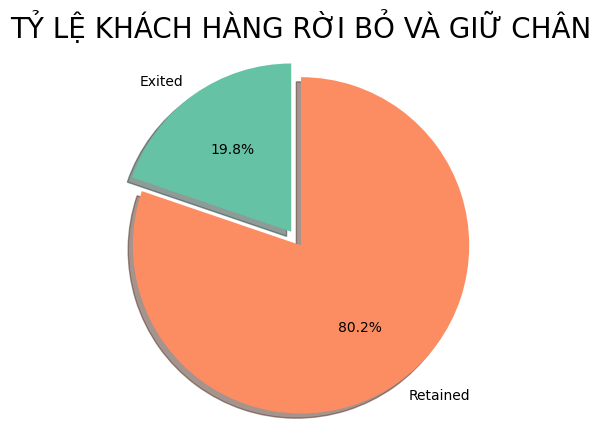

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG RỜI BỎ VÀ GIỮ CHÂN", size = 20)
plt.show()

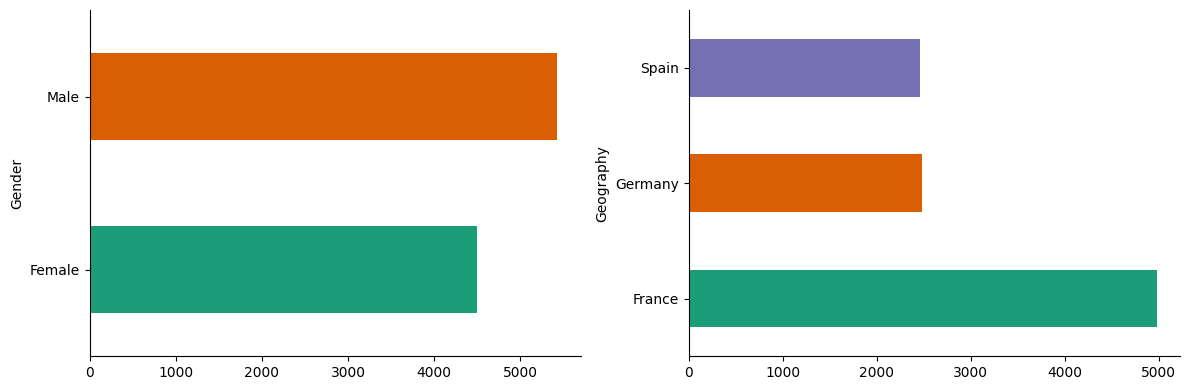

In [ ]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Geography']
def cat_plot(col):
  df.groupby(col).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

# Create a chart grid for each categorical variable
plt.figure(figsize=(12, 4))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 2, i)
    cat_plot(var)

# adjust spacing between subplots
plt.tight_layout()

# show plot
plt.show()

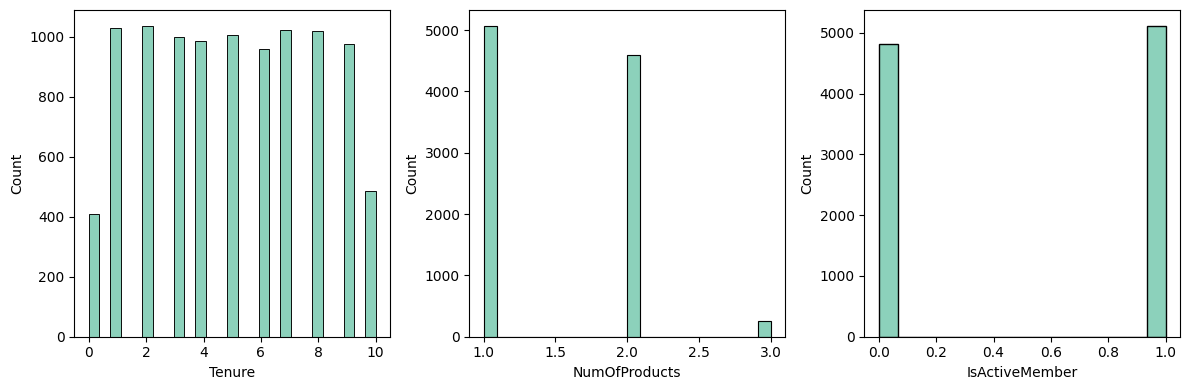

In [ ]:
# List of numerical variables to plot
num_vars = ["Tenure", "NumOfProducts", "IsActiveMember"]

# Create a chart grid for each numerical variable
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
axs = axs.ravel()

for i in range(len(num_vars)):
  sns.histplot(df[num_vars[i]], ax = axs[i])

fig.tight_layout()
plt.show()

<Axes: xlabel='Tenure', ylabel='Exited'>

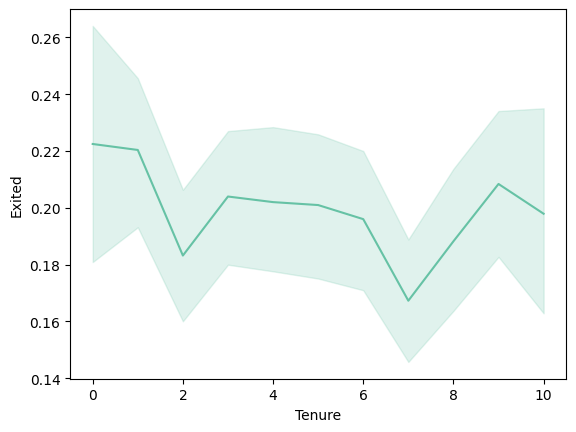

In [ ]:
# Distribution of Tenure compare to Exited column
sns.lineplot(x = 'Tenure', y = 'Exited', data = df)

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

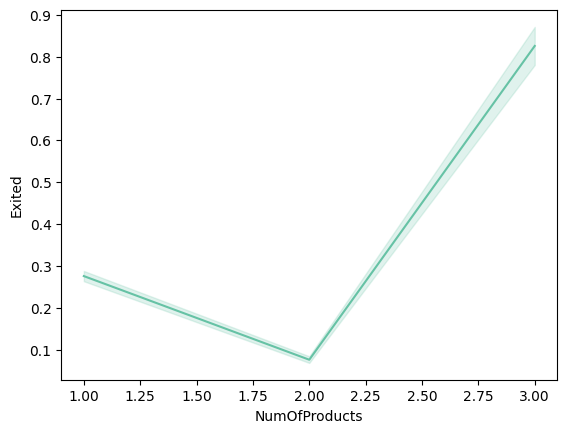

In [ ]:
# Distribution of NumOfProducts compare to Exited column
sns.lineplot(x = 'NumOfProducts', y = 'Exited', data = df)

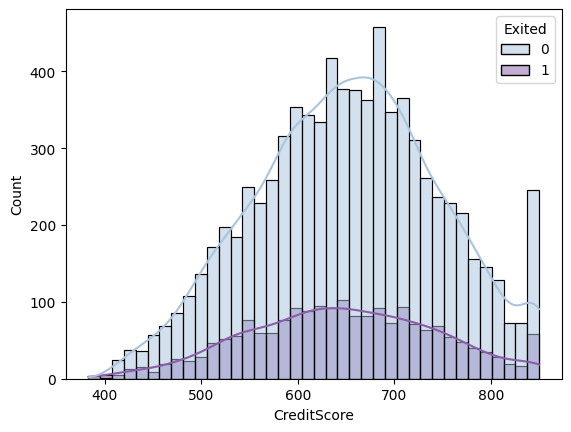

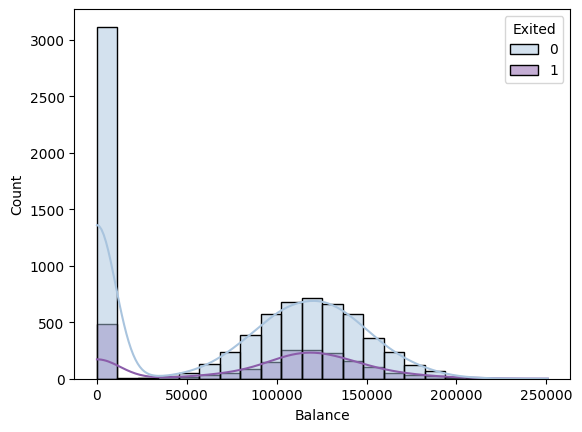

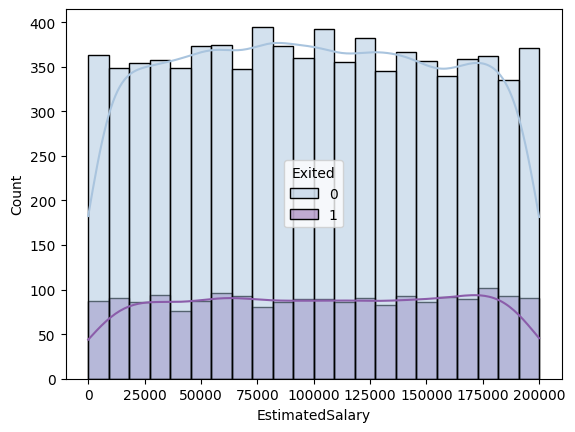

In [ ]:
crecol= ['CreditScore', 'Balance', 'EstimatedSalary']
for i in crecol:
    sns.histplot (data = df, x= i, kde = True, hue = 'Exited', fill=True, palette='BuPu' )
    plt.show()

# Scatter plot

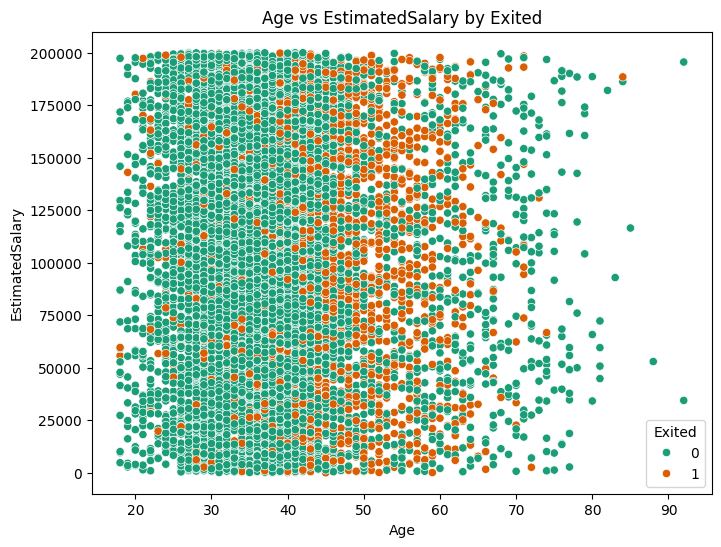

In [ ]:
# Age vs EstimatedSalary by Exited
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x= 'Age', y = 'EstimatedSalary', hue = 'Exited', palette = 'Dark2')
plt.title('Age vs EstimatedSalary by Exited')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

# Feature Engineering
## Công thức Balance / EstimatedSalary được sử dụng trong ngành tín dụng để đo lường mức độ nợ của một cá nhân so với thu nhập ước tính của họ. Công thức này được tính bằng cách chia số dư còn lại trên tài khoản hoặc tín dụng của khách hàng cho thu nhập ước tính của họ. Điều này giúp các tổ chức tín dụng đánh giá khả năng thanh toán của một khách hàng dựa trên mức độ nợ của họ so với thu nhập.
  ### Balance = Số dư còn lại trên tài khoản hoặc tín dụng của khách hàng
  ### EstimatedSalary = Thu nhập ước tính của họ

In [ ]:
df["BalanceSalaryRatio"] = df["Balance"] / df["EstimatedSalary"]

# Data Preprocessing

In [ ]:
scale_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio']

scaler = MinMaxScaler()
df[scale_var] = scaler.fit_transform(df[scale_var])

In [ ]:
# Encode labels where dtype is 'object'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
0,0.505353,0,0,0.324324,0.2,0.000000,0.0,1,0.506735,1,0.000000
1,0.481799,2,0,0.310811,0.1,0.334031,0.0,1,0.562709,0,0.000070
2,0.254818,0,0,0.324324,0.8,0.636357,1.0,0,0.569654,1,0.000132
3,0.676660,0,0,0.283784,0.1,0.000000,0.5,0,0.469120,0,0.000000
4,1.000000,2,0,0.337838,0.2,0.500246,0.0,1,0.395400,0,0.000150


In [ ]:
column_list = list(df.iloc[ : , : -1])
column_list.insert(-1, 'BalanceSalaryRatio')
df = df[column_list]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,Exited
0,0.505353,0,0,0.324324,0.2,0.000000,0.0,1,0.506735,0.000000,1
1,0.481799,2,0,0.310811,0.1,0.334031,0.0,1,0.562709,0.000070,0
2,0.254818,0,0,0.324324,0.8,0.636357,1.0,0,0.569654,0.000132,1
3,0.676660,0,0,0.283784,0.1,0.000000,0.5,0,0.469120,0.000000,0
4,1.000000,2,0,0.337838,0.2,0.500246,0.0,1,0.395400,0.000150,0


# Heatmap Correlation

<Axes: >

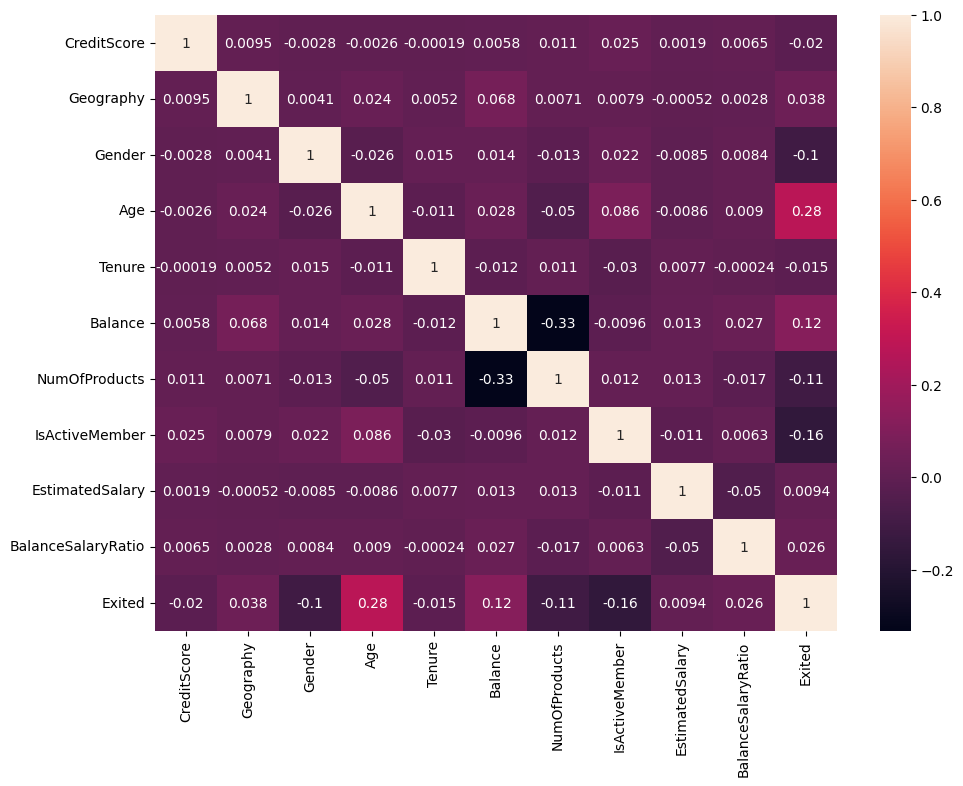

In [ ]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize = (11, 8))
sns.heatmap(df.corr(), annot = True)

# Train Test Split

In [ ]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
from sklearn import tree
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, matthews_corrcoef, roc_curve

In [ ]:
# split data into train and test set (test size 30% and train size 70%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [ ]:
# Create a DecisionRegressor object
model = tree.DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict test dataset
y_pred_tree = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Giả sử bạn có y_true và y_pred
report = classification_report(y_test, y_pred_tree, output_dict=True)
report_tree = pd.DataFrame(report).transpose()

print(tabulate(report_tree, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤═════════════╤══════════╤════════════╤═════════════╕
│              │   precision │   recall │   f1-score │     support │
╞══════════════╪═════════════╪══════════╪════════════╪═════════════╡
│ 0            │    0.877824 │ 0.868018 │   0.872894 │ 2417        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 1            │    0.457483 │ 0.479501 │   0.468233 │  561        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ accuracy     │    0.794829 │ 0.794829 │   0.794829 │    0.794829 │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ macro avg    │    0.667654 │ 0.67376  │   0.670563 │ 2978        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ weighted avg │    0.79864  │ 0.794829 │   0.796663 │ 2978        │
╘══════════════╧═════════════╧══════════╧════════════╧═════════════╛


<ipython-input-190-f02de7db0b7b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)


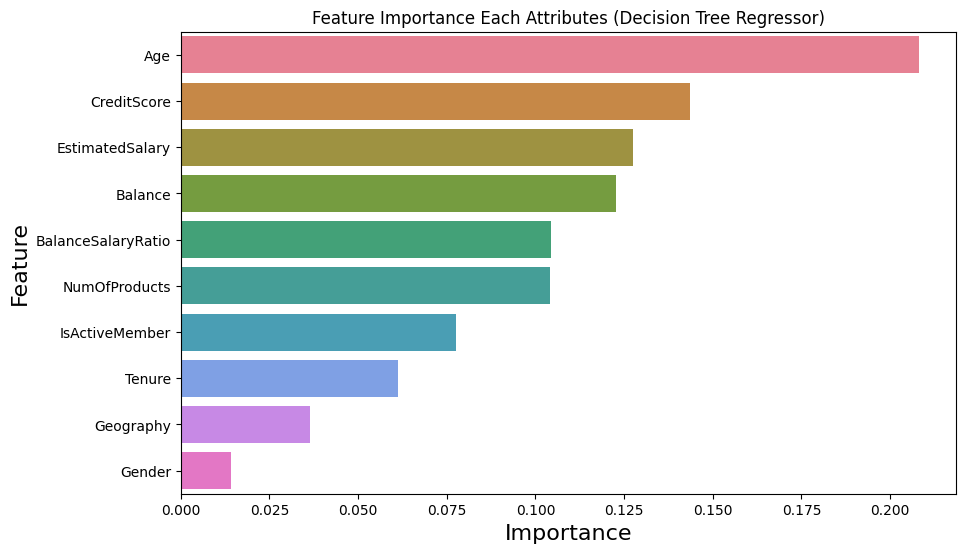

In [ ]:
imp_df = pd.DataFrame(\
{
    "Feature": X_train.columns,\
    "Importance": model.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)

fi2 = fi.head(10)


palette = sns.color_palette("husl", len(fi2))


plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)
plt.title("Feature Importance Each Attributes (Decision Tree Regressor)")
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()

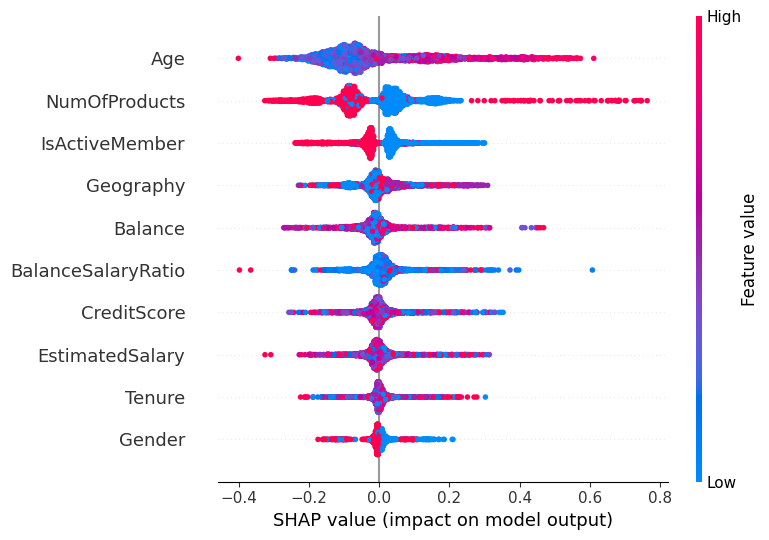

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for all data points
shap_values = explainer.shap_values(X_test)

# Plot the summary plot

# Summary plot for all features
shap.summary_plot(shap_values, X_test )

# Data Augmentation

In [ ]:
exited = df[df['Exited'] == 1]
existing = df[df['Exited'] == 0]

num_exited = len(exited)
num_existing = len(existing)

# Nếu số lượng mẫu trong nhóm "Existing" lớn hơn 0, thực hiện oversampling
if num_existing > 0:
    # Oversampling nhóm Exited để có số lượng mẫu tương đương với nhóm Existing
    exited_oversampled = resample(exited, replace=True, n_samples=num_existing, random_state=42)

    # Kết hợp lại dữ liệu sau khi oversampling
    data_oversampled = pd.concat([exited_oversampled, existing])

else:
    print("Không thể thực hiện oversampling vì số lượng mẫu trong nhóm 'Existing' là 0.")

In [ ]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 5606 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         15926 non-null  float64
 1   Geography           15926 non-null  int64  
 2   Gender              15926 non-null  int64  
 3   Age                 15926 non-null  float64
 4   Tenure              15926 non-null  float64
 5   Balance             15926 non-null  float64
 6   NumOfProducts       15926 non-null  float64
 7   IsActiveMember      15926 non-null  int64  
 8   EstimatedSalary     15926 non-null  float64
 9   BalanceSalaryRatio  15926 non-null  float64
 10  Exited              15926 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


In [ ]:
# Tách dữ liệu thành features và target
X = data_oversampled.drop('Exited', axis=1)
y = data_oversampled['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with default parameters

In [ ]:
# instantiate the classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_rf = model.predict(X_test)

In [ ]:
# Giả sử bạn có y_true và y_pred
report = classification_report(y_test, y_pred, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

print(tabulate(report_rf, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤═════════════╤══════════╤════════════╤═════════════╕
│              │   precision │   recall │   f1-score │     support │
╞══════════════╪═════════════╪══════════╪════════════╪═════════════╡
│ 0            │    0.980498 │ 0.922201 │   0.950456 │ 1581        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 1            │    0.927604 │ 0.981931 │   0.953995 │ 1605        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ accuracy     │    0.952291 │ 0.952291 │   0.952291 │    0.952291 │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ macro avg    │    0.954051 │ 0.952066 │   0.952226 │ 3186        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ weighted avg │    0.953852 │ 0.952291 │   0.952239 │ 3186        │
╘══════════════╧═════════════╧══════════╧════════════╧═════════════╛


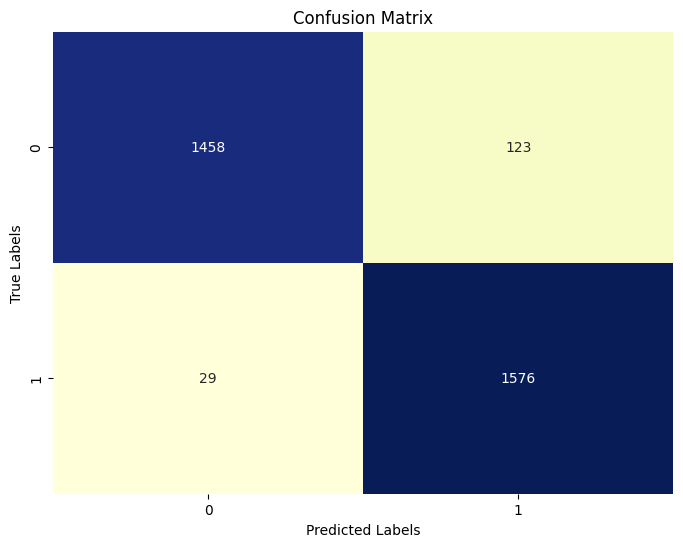

In [ ]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

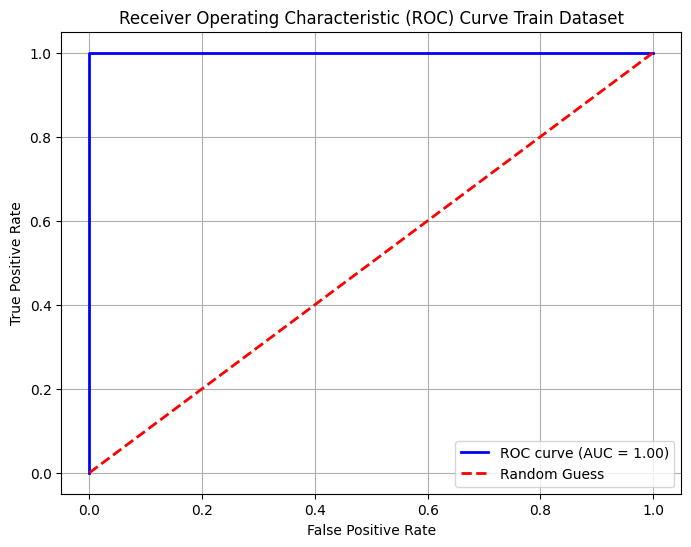

In [ ]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for Random Forest model
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])

# Check ROC Curve
auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Train Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

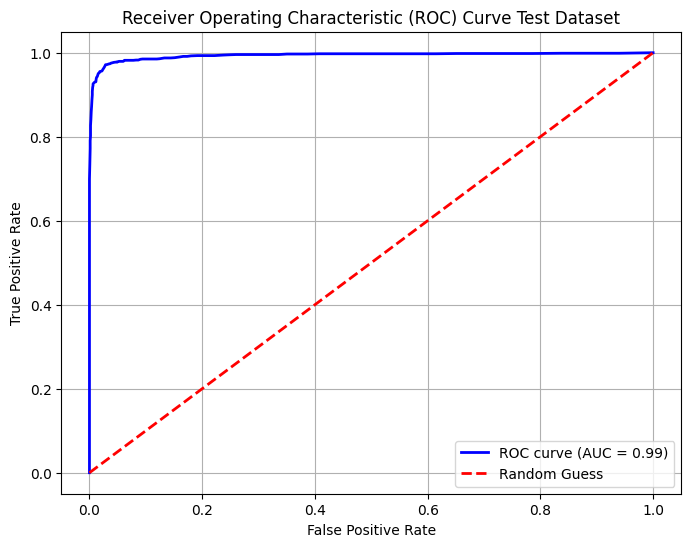

In [ ]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for Random Forest model
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Check ROC Curve
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Test Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Thực hiện cross-validation với k=5 fold
scores = cross_val_score(model, X, y, cv=5)


print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.95103578 0.95259027 0.94882261 0.94474097 0.94850863]
Average cross-validation score: 0.9491396523842044


# Feature Importance

<ipython-input-202-81cd2a1679eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)


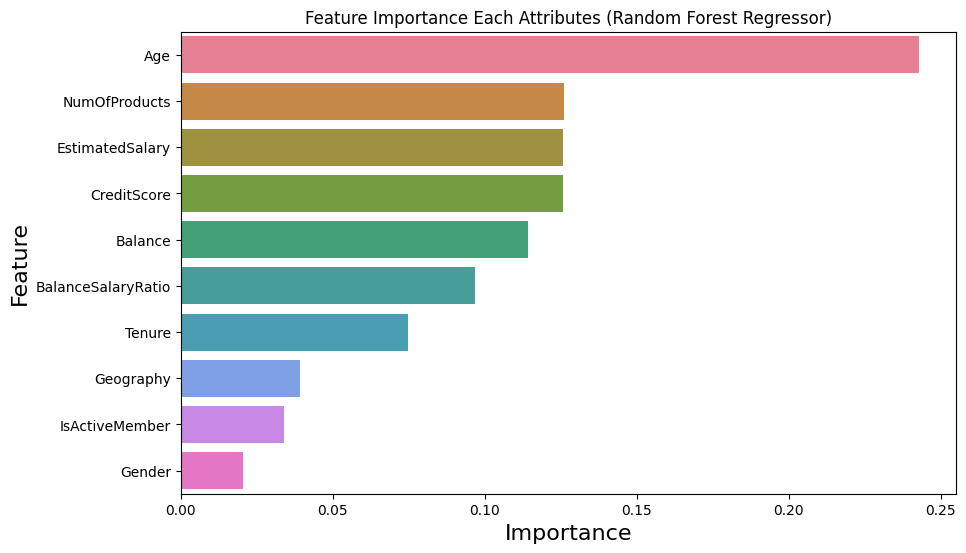

In [ ]:
imp_df = pd.DataFrame(\
{
    "Feature": X_train.columns,\
    "Importance": model.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)

fi2 = fi.head(10)

palette = sns.color_palette("husl", len(fi2))


plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)
plt.title("Feature Importance Each Attributes (Random Forest Regressor)")
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()